In [2]:
import pandas as pd

In [3]:
sp = pd.read_csv('../data/SP.csv')

In [4]:
sp = sp[sp['volume'] != 0]

In [5]:
sp.head()

,date,time,price,volume
2812944,06/30/2003,23:00:06.000,971.9,1
2812945,06/30/2003,23:00:14.000,972.0,1
2812946,06/30/2003,23:04:16.000,972.0,1
2812947,06/30/2003,23:04:34.000,972.0,9
2812948,06/30/2003,23:05:02.000,972.0,91


In [6]:
print(f"Rows with Volume = 0: {(sp['volume'] == 0).sum()}")

Rows with Volume = 0: 0


In [7]:
sp.describe(include='all')

,date,time,price,volume
count,6498085,6498085,6.498085e+06,6.498085e+06
unique,5094,747985,NaN,NaN
top,10/08/2008,07:30:00.000,NaN,NaN
freq,20796,5287,NaN,NaN
mean,NaN,NaN,1.275834e+03,1.800299e+00
std,NaN,NaN,2.756042e+02,9.512023e+00
min,NaN,NaN,6.711000e+02,1.000000e+00
25%,NaN,NaN,1.113900e+03,1.000000e+00
50%,NaN,NaN,1.251000e+03,1.000000e+00
75%,NaN,NaN,1.389700e+03,2.000000e+00


In [8]:
# Convert time column to string format first, then combine
sp['date_time'] = pd.to_datetime(sp['date'].astype(str) + ' ' + sp['time'].astype(str))

In [9]:
sp_processed = sp[['date_time', 'price', 'volume']].copy()
sp_processed.columns = ['date_time', 'price', 'volume']

In [10]:
from mlfinlab.data_structures import time_data_structures

time_bars = time_data_structures.get_time_bars(
    sp_processed, resolution="D", verbose=False
)
time_bars

<frozen mlfinlab.util.fast_ewma>:17: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2003-07-01,25,971.9,972.3,971.5,972.0,152,143,24,147744.5
2003-07-02,2189,972.6,984.0,966.5,983.2,4577,2202,2164,4453872.8
2003-07-03,4829,983.2,993.9,981.5,992.4,5480,2908,2640,5396092.9
2003-07-04,6933,992.0,993.0,983.6,986.4,4394,1857,2104,4340481.4
2003-07-07,7242,985.0,987.2,983.4,986.8,674,360,309,664186.1
...,...,...,...,...,...,...,...,...,...
2019-12-21,6498064,3208.9,3216.5,3208.9,3216.5,4,3,4,12854.4
2019-12-24,6498074,3227.7,3232.3,3227.7,3230.8,10,5,10,32307.5
2019-12-25,6498075,3229.8,3229.8,3229.8,3229.8,5,0,1,16149.0


In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=time_bars[:].index,
                open=time_bars['open'],
                high=time_bars['high'],
                low=time_bars['low'],
                close=time_bars['close'])])
fig.update_layout(title='Time Bars - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [12]:
time_bars.loc['2007-01-01':'2008-01-01', 'high'].max()

1584.0

In [13]:
time_bars.loc['2009-01-01':'2010-01-01', 'low'].min()

671.1

In [14]:
high_2007 = time_bars.loc['2007', 'high'].max()
low_2009 = time_bars.loc['2009', 'low'].min()
decline_pct = (low_2009 - high_2007) / high_2007 * 100

print(f"2007 High: {high_2007:.2f}")
print(f"2009 Low: {low_2009:.2f}")
print(f"Total decline: {decline_pct:.1f}%")

2007 High: 1584.00
2009 Low: 671.10
Total decline: -57.6%


In [15]:
time_bars[(time_bars.index >= '2007-01-01') & (time_bars.index <= '2008-01-01')]['high'].max()

1584.0

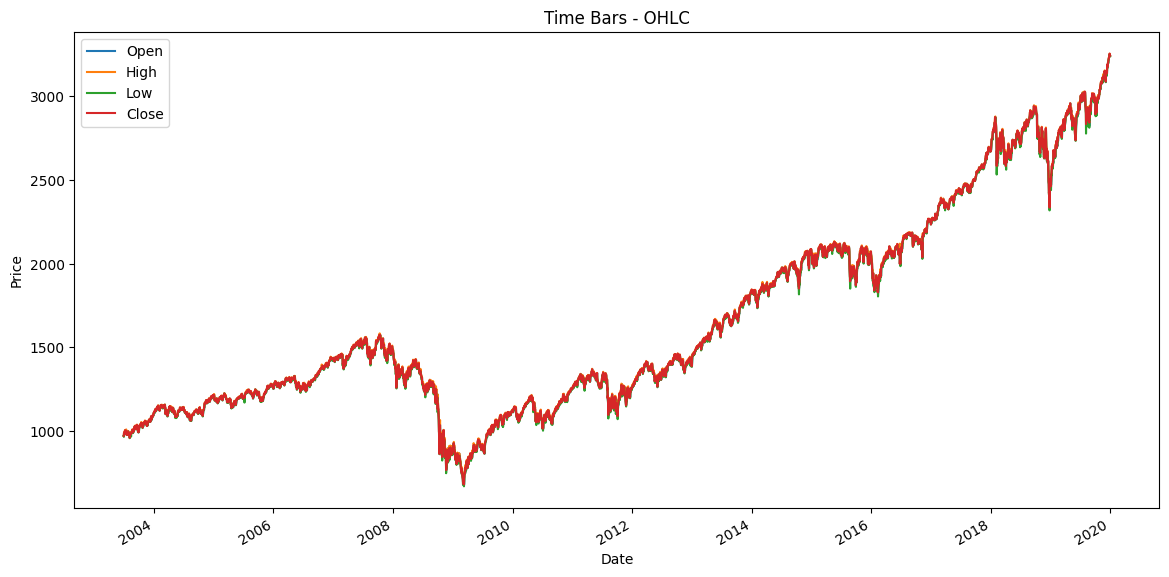

In [16]:
import matplotlib.pyplot as plt

# Plot all OHLC data
fig, ax = plt.subplots(figsize=(14, 7))
time_bars[['open', 'high', 'low', 'close']].plot(ax=ax)
plt.title('Time Bars - OHLC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.show()

In [17]:
from mlfinlab.data_structures import standard_data_structures
dollar_bars = standard_data_structures.get_dollar_bars(
    sp_processed, threshold=1000000, batch_size=100000, verbose=False
)
print("Dollar Bars:")
print(dollar_bars)
print(f"Dollar bars shape: {dollar_bars.shape}")

Dollar Bars:
                         tick_num    open    high     low   close  volume   
date_time                                                                   
2003-07-01 03:16:58.000       428   971.9   975.0   971.3   971.9    1031  \
2003-07-01 06:32:13.000       960   972.0   973.2   971.1   971.3    1030   
2003-07-01 07:44:30.000      1428   971.3   972.0   967.6   968.1    1032   
2003-07-01 16:26:05.000      1901   968.0   982.4   966.5   982.3    1030   
2003-07-02 01:51:56.000      2324   982.3   984.0   981.3   983.2    1020   
...                           ...     ...     ...     ...     ...     ...   
2019-10-09 04:47:38.158   6497070  2987.6  2987.6  2879.8  2917.4     343   
2019-10-15 03:50:22.219   6497326  2921.8  2982.3  2883.9  2978.8     342   
2019-11-01 04:52:15.881   6497521  2978.6  3052.5  2973.8  3041.0     333   
2019-11-21 04:53:49.953   6497755  3041.0  3132.0  3038.8  3106.9     324   
2019-12-11 06:32:24.337   6497977  3106.9  3153.6  3082.9  3136

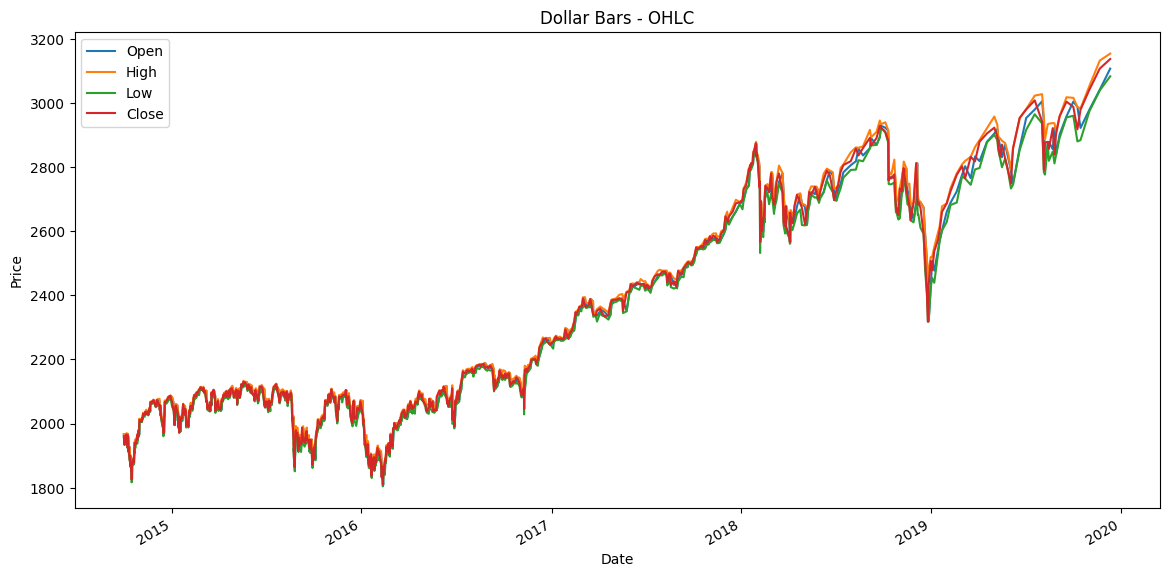

In [18]:
# Plot all OHLC data
fig, ax = plt.subplots(figsize=(14, 7))
dollar_bars[-1000:][['open', 'high', 'low', 'close']].plot(ax=ax)
plt.title('Dollar Bars - OHLC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.show()

In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=time_bars[-500:].index,
                open=time_bars['open'],
                high=time_bars['high'],
                low=time_bars['low'],
                close=time_bars['close'])])
fig.update_layout(title='Time Bars - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [20]:
'''Snippet 3.1 - Daily Volatility Estimates'''

def getdailyVol(close, span0=100):
    df0 = close.index.searchsorted(close.index - pd.Timedelta(days=1))
    df0 = df0[df0 > 0]
    df0 = pd.Series(close.index[df0 - 1], index=close.index[close.shape[0] - df0.shape[0]:])
    df0 = close.loc[df0.index]/close.loc[df0.values].values - 1.0
    df0 = df0.ewm(span=span0).std()
    return df0

In [21]:
'''Snippet 2.4 the Symetric CUSUM Filter'''

def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0, 0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos = max(0, sPos + diff.loc[i])
        sNeg = min(0, sNeg + diff.loc[i])
        # Use dynamic threshold if h is a Series, skip if not available
        if isinstance(h, pd.Series):
            if i not in h.index:
                continue
            threshold = h.loc[i]
        else:
            threshold = h
        if sNeg < -threshold:
            sNeg = 0
            tEvents.append(i)
        elif sPos > threshold:
            sPos = 0
            tEvents.append(i)
    return pd.DatetimeIndex(tEvents)

In [22]:
dv = getdailyVol(time_bars['close'], span0=100)

In [23]:
tevents = getTEvents(time_bars['close'], dv)

In [24]:
#devents = getTEvents(dollar_bars['close'], dv)

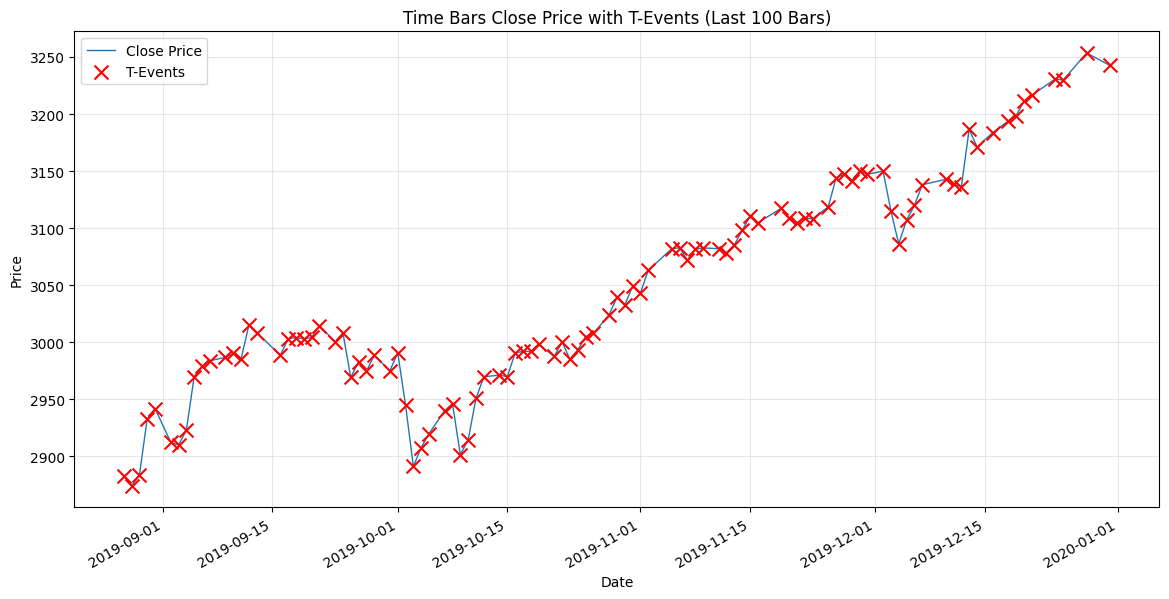

In [25]:
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot last 100 close prices
time_bars['close'][-100:].plot(ax=ax, label='Close Price', linewidth=1)

# Overlay tevents with 'x' markers (only those in the last 500 bars)
if len(tevents) > 0:
    # Filter tevents to only those in the last 500 bars
    last_x_dates = time_bars[-100:].index
    tevents_filtered = tevents[tevents.isin(last_x_dates)]
    
    if len(tevents_filtered) > 0:
        # Get close prices at tevent dates
        tevent_prices = time_bars.loc[tevents_filtered, 'close']
        ax.scatter(tevents_filtered, tevent_prices, color='red', marker='x', s=100, 
                   label='T-Events', zorder=5)

plt.title('Time Bars Close Price with T-Events (Last 100 Bars)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
'''Snippet 3.2 TRIPPLE-BARRIER LABELING METHOD'''

def applyPtSlOnT1(close, events, ptSl, molecule):
    events_ = events.loc[molecule]
    out = events_[['t1']].copy(deep=True)
    if ptSl[0] > 0:
        pt = ptSl[0] * events_['trgt']
    else:
        pt = pd.Series(index=events.index) #NaNa
    if ptSl[1] > 0:
        sl = -ptSl[1] * events_['trgt']
    else:
        sl = pd.Series(index=events.index) #NaNa
    for loc, t1 in events_['t1'].fillna(close.index[-1]).iteritems():
        df0 = close[loc:t1]  # path prices
        df0 = (df0 / close[loc] - 1)  # path returns
        out.loc[loc, 'sl'] = df0[df0 < sl.loc[loc]].index.min()  # earliest stop loss
        out.loc[loc, 'pt'] = df0[df0 > pt.loc[loc]].index.min()  # earliest profit taking
    return out
    

In [29]:
import numpy as np
'''Snippet 3.5 LABELING FOR SIDE AND SIZE'''

def getBins(events, close):
    events_ = events.dropna(subset=['t1'])
    px = events_.index.union(events_['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')

    out = pd.DataFrame(index=events_.index)
    out['ret'] = px.loc[events_['t1'].values].values / px.loc[events_.index].values - 1.0
    out['bin'] = np.sign(out['ret'])
    return out


In [28]:
'''Snippet 3.8 DROPPING UNDER-POPULATED LABELS'''

def dropLabels(events, minPtc=0.05):

    while True:
        df0 = events['bin'].value_counts(normalize=True)
        if df0.min() > minPtc or df0.shape[0] < 3:
            break
        print( 'dropped label', df0.argnim())
        events = events[events['bin'] != df0.argmin()]
    return events